In [1]:
import math,random
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import operator
import seaborn as sns

# Dataset

In [2]:
dataset = pd.read_csv('datasets/heart.csv')
random.seed()
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
data=dataset.iloc[:,:13]
target = dataset.iloc[:,-1:]
target

,target
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


# Preprocessing

In [6]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled

array([[0.19745405, 0.00313419, 0.00940257, ..., 0.        , 0.        ,
        0.00313419],
       [0.10874818, 0.00293914, 0.00587828, ..., 0.        , 0.        ,
        0.00587828],
       [0.1368249 , 0.        , 0.00333719, ..., 0.00667439, 0.        ,
        0.00667439],
       ...,
       [0.23671899, 0.00348116, 0.        , ..., 0.00348116, 0.00696232,
        0.01044348],
       [0.25352009, 0.00444772, 0.        , ..., 0.00444772, 0.00444772,
        0.01334316],
       [0.1749685 , 0.        , 0.00306962, ..., 0.00306962, 0.00306962,
        0.00613925]])

# KNN Berdasarkan nilai k

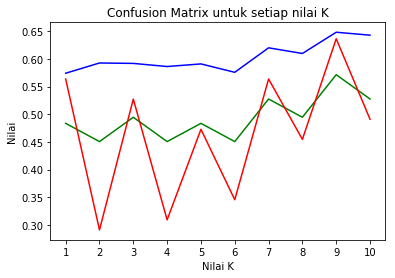

,method,Hasil
0,Akurasi,0.493407
1,Recall,0.465455
2,Presisi,0.603214


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

x_train, x_test = train_test_split(data_scaled, test_size=0.3)
y_train, y_test = train_test_split(target, test_size=0.3)


akurasii=[]
presisii=[]
recalll=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train.values.ravel())
    pred=knn.predict(x_test)
    akurasi=metrics.accuracy_score(y_test, pred)
    presisi = metrics.precision_score(y_test, pred)
    recall = metrics.recall_score(y_test, pred)
    akurasii.append(akurasi)
    presisii.append(presisi)
    recalll.append(recall)


plt.title('Confusion Matrix untuk setiap nilai K')
plt.plot(akurasii,color='green' ,label = 'Akurasi')
plt.plot(recalll,color='red' ,label = 'Recall')
plt.plot(presisii,color='blue' ,label = 'Presisi')
plt.ylabel('Nilai')
plt.xlabel('Nilai K')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

benchmark = {
    'method' : ['Akurasi', 'Recall', 'Presisi'],
    'Hasil' : [
        np.around(np.mean(akurasii), decimals=10),
        np.around(np.mean(recalll), decimals=10),
        np.around(np.mean(presisii), decimals=10),
    ],
}
benchmark_df = pd.DataFrame.from_dict(benchmark)
benchmark_df

# KNN Berdasarkan Pembagian Data Split

Saat K-Fold =  5


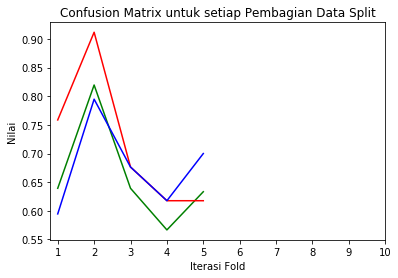

    method     Hasil
0  Akurasi  0.659672
1   Recall  0.716430
2  Presisi  0.676717


Saat K-Fold =  6


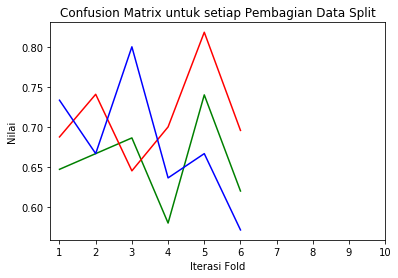

    method     Hasil
0  Akurasi  0.656667
1   Recall  0.714539
2  Presisi  0.679076


Saat K-Fold =  7


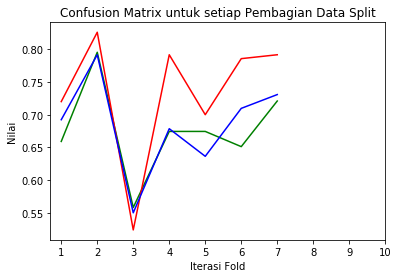

    method     Hasil
0  Akurasi  0.676231
1   Recall  0.734135
2  Presisi  0.684194


Saat K-Fold =  8


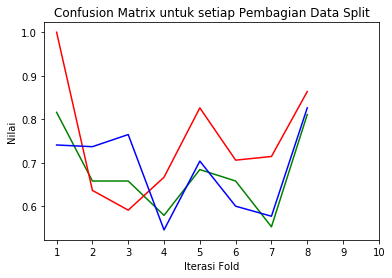

    method     Hasil
0  Akurasi  0.677009
1   Recall  0.750479
2  Presisi  0.686807


Saat K-Fold =  9


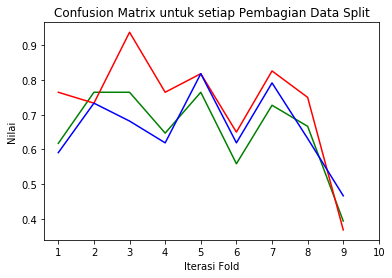

    method     Hasil
0  Akurasi  0.656170
1   Recall  0.734771
2  Presisi  0.661361


Saat K-Fold =  10


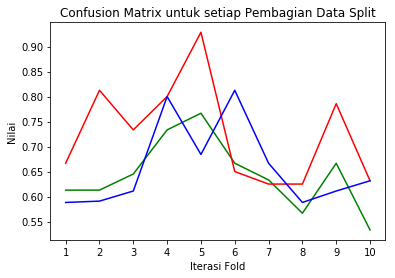

    method     Hasil
0  Akurasi  0.643763
1   Recall  0.725836
2  Presisi  0.658456




In [8]:
from sklearn.model_selection import KFold
for i in range(5,11):
    kf = KFold(n_splits = i, shuffle=True)
    kf.get_n_splits(data_scaled, target)
    akurasii=[]
    presisii=[]
    recalll=[]
  
    for trainn, testt in kf.split(data_scaled, target):
        X_train = data.iloc[trainn]
        Y_train = target.iloc[trainn]
        X_test = data.iloc[testt]
        Y_test = target.iloc[testt]
        knn = KNeighborsClassifier(n_neighbors=7)
        knn.fit(X_train,Y_train.values.ravel())
        pred=knn.predict(X_test)
        akurasi=metrics.accuracy_score(Y_test, pred)
        presisi = metrics.precision_score(Y_test, pred)
        recall = metrics.recall_score(Y_test, pred)
        akurasii.append(akurasi)
        presisii.append(presisi)
        recalll.append(recall)
    
    print("Saat K-Fold = ",i)
    plt.title('Confusion Matrix untuk setiap Pembagian Data Split')
    plt.plot(akurasii,color='green' ,label = 'Akurasi')
    plt.plot(recalll,color='red' ,label = 'Recall')
    plt.plot(presisii,color='blue' ,label = 'Presisi')
    plt.ylabel('Nilai')
    plt.xlabel('Iterasi Fold')
    plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
    plt.show()
    
    benchmark = {
        'method' : ['Akurasi', 'Recall', 'Presisi'],
        'Hasil' : [
            np.around(np.mean(akurasii), decimals=10),
            np.around(np.mean(recalll), decimals=10),
            np.around(np.mean(presisii), decimals=10),
        ],
    }
    benchmark_df = pd.DataFrame.from_dict(benchmark)
    print(benchmark_df)
    print("\n")

# KNN jika dibandingkan dengan algoritma lain

In [9]:
# KNN

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


================================KNN===================================


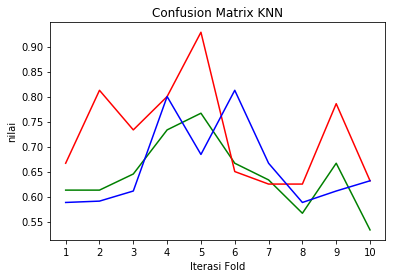

    method     Hasil
0  Akurasi  0.673118
1   Recall  0.744793
2  Presisi  0.688585
=============================Decision Tree================================


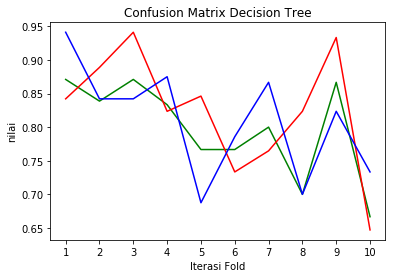

    method     Hasil
0  Akurasi  0.798065
1   Recall  0.824381
2  Presisi  0.809713
=============================Random Forest================================


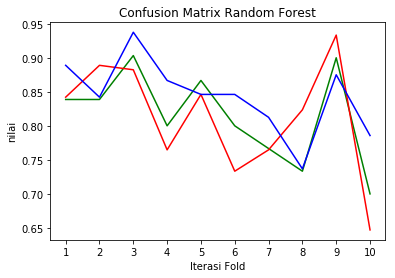

    method     Hasil
0  Akurasi  0.814731
1   Recall  0.812617
2  Presisi  0.843752


In [10]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

for i in range(5,11):
    kf = KFold(n_splits = i, shuffle=True)
    kf.get_n_splits(data_scaled, target)
    akurasii1=[]
    presisii1=[]
    recalll1=[]
    
    akurasii2=[]
    presisii2=[]
    recalll2=[]
    
    akurasii3=[]
    presisii3=[]
    recalll3=[]
  
    for trainn, testt in kf.split(data_scaled, target):
        
        X_train = data.iloc[trainn]
        Y_train = target.iloc[trainn]
        X_test = data.iloc[testt]
        Y_test = target.iloc[testt]
        
        #KNN
        knn = KNeighborsClassifier(n_neighbors=7)
        knn.fit(X_train,Y_train.values.ravel())
        pred=knn.predict(X_test)
        
        akurasi=metrics.accuracy_score(Y_test, pred)
        presisi = metrics.precision_score(Y_test, pred)
        recall = metrics.recall_score(Y_test, pred)
        
        akurasii1.append(akurasi)
        presisii1.append(presisi)
        recalll1.append(recall)
        
        #Decision Tree
        Decision_Tree = DecisionTreeClassifier()
        Decision_Tree.fit(X_train,Y_train.values.ravel())
        pred = Decision_Tree.predict(X_test)
        
        akurasi=metrics.accuracy_score(Y_test, pred)
        presisi = metrics.precision_score(Y_test, pred)
        recall = metrics.recall_score(Y_test, pred)
        
        akurasii2.append(akurasi)
        presisii2.append(presisi)
        recalll2.append(recall)
        
        #Random Forest
        Random_Forest = RandomForestClassifier()
        Random_Forest.fit(X_train,Y_train.values.ravel())
        pred = Random_Forest.predict(X_test)
        
        akurasi=metrics.accuracy_score(Y_test, pred)
        presisi = metrics.precision_score(Y_test, pred)
        recall = metrics.recall_score(Y_test, pred)
        
        akurasii3.append(akurasi)
        presisii3.append(presisi)
        recalll3.append(recall)
        
print("================================KNN===================================")
plt.title('Confusion Matrix KNN')
plt.plot(akurasii,color='green' ,label = 'Akurasi')
plt.plot(recalll,color='red' ,label = 'Recall')
plt.plot(presisii,color='blue' ,label = 'Presisi')
plt.ylabel('nilai')
plt.xlabel('Iterasi Fold')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

benchmark1 = {
    'method' : ['Akurasi', 'Recall', 'Presisi'],
    'Hasil' : [
        np.around(np.mean(akurasii1), decimals=10),
        np.around(np.mean(recalll1), decimals=10),
        np.around(np.mean(presisii1), decimals=10),
    ],
}
benchmark_df = pd.DataFrame.from_dict(benchmark1)
print(benchmark_df)
    
print("=============================Decision Tree================================")
plt.title('Confusion Matrix Decision Tree')
plt.plot(akurasii2,color='green' ,label = 'Akurasi')
plt.plot(recalll2,color='red' ,label = 'Recall')
plt.plot(presisii2,color='blue' ,label = 'Presisi')
plt.ylabel('nilai')
plt.xlabel('Iterasi Fold')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

benchmark2 = {
    'method' : ['Akurasi', 'Recall', 'Presisi'],
    'Hasil' : [
        np.around(np.mean(akurasii2), decimals=10),
        np.around(np.mean(recalll2), decimals=10),
        np.around(np.mean(presisii2), decimals=10),
    ],
}
benchmark_df = pd.DataFrame.from_dict(benchmark2)
print(benchmark_df)
    
print("=============================Random Forest================================")
plt.title('Confusion Matrix Random Forest')
plt.plot(akurasii3,color='green' ,label = 'Akurasi')
plt.plot(recalll3,color='red' ,label = 'Recall')
plt.plot(presisii3,color='blue' ,label = 'Presisi')
plt.ylabel('nilai')
plt.xlabel('Iterasi Fold')
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

benchmark3 = {
    'method' : ['Akurasi', 'Recall', 'Presisi'],
    'Hasil' : [
        np.around(np.mean(akurasii3), decimals=10),
        np.around(np.mean(recalll3), decimals=10),
        np.around(np.mean(presisii3), decimals=10),
    ],
}
benchmark_df = pd.DataFrame.from_dict(benchmark3)
print(benchmark_df)
        